<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/other_proj/hajar/cuml_Balancing_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proj 1: Intrusion detection using data balancing & machine learning methods

> ### Install the cuML & XGBoost packages.

To install the cuML package you use the following commands:

### Testing for GPU

In [ ]:
import torch
torch.cuda.is_available() # If True, the GPU is activated

True

In [ ]:
import tensorflow as tf
#import cuml

tf.test.gpu_device_name()

'/device:GPU:0'

### New installation of cuML
ref: https://colab.research.google.com/drive/1xetPfTNFqm8kLVqut6LHPnPIT2GA1bVA?usp=sharing#scrollTo=gp6bQTd9hl1X

In [ ]:
#ref:https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/rapids-pip-colab-template.ipynb?ncid=so-othe-933049-vt27#scrollTo=B0C8IV5TQnjN

# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 566, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 566 (delta 188), reused 144 (delta 100), pack-reused 269 (from 1)
Receiving objects: 100% (566/566), 182.35 KiB | 844.00 KiB/s, done.
Resolving deltas: 100% (290/290), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.5 MB/s eta 0:00:00
Installing RAPIDS remaining 24.10.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.7/567.7 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 167.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.5/915.5 kB 195.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#### RAPIDS is now installed on Colab.  
You can copy your code into the cells below or use the below to validate your RAPIDS installation and version.  


In [ ]:
import cudf
cudf.__version__

'24.10.01'

In [ ]:
import cuml
cuml.__version__

'24.10.00'

In [ ]:
import cugraph
cugraph.__version__

'24.10.00'

In [ ]:
import cuspatial
cuspatial.__version__

'24.04.00'

In [ ]:
import cuxfilter
cuxfilter.__version__

'24.04.01'

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8789032274251275949
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8274950570614803717
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
# Checking RAM
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:         2537404 kB
MemAvailable:   11453540 kB
Buffers:          140556 kB
Cached:          8749312 kB
SwapCached:            0 kB
Active:          1112772 kB
Inactive:        8937940 kB
Active(anon):       2152 kB
Inactive(anon):  1171620 kB
Active(file):    1110620 kB
Inactive(file):  7766320 kB
Unevictable:           8 kB
Mlocked:               8 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             23344 kB
Writeback:             0 kB
AnonPages:       1161060 kB
Mapped:          1045952 kB
Shmem:             12848 kB
KReclaimable:     364600 kB
Slab:             447804 kB
SReclaimable:     364600 kB
SUnreclaim:        83204 kB
KernelStack:        6576 kB
PageTables:        13564 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    5542692 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       84772 kB
VmallocChunk:    

In [ ]:
# Install imblearn if not already installed
!pip install imbalanced-learn xgboost

In [ ]:
import sklearn; sklearn.show_versions()

In [ ]:
!python --version

### 1) The Preprocess and train section:

#### - Preparing and processing the Data

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
# Import the necessary libraries
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN, GRU, Bidirectional
from imblearn.over_sampling import SMOTE, ADASYN  # Import SMOTE and ADASYN
from imblearn.under_sampling import RandomUnderSampler  # Import Random Undersampling
from imblearn.over_sampling import RandomOverSampler  # Import Random Oversampling
from imblearn.combine import SMOTEENN  # Import SMOTE + Edited Nearest Neighbors
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
#from sklearn.svm import SVC  # Import SVM classifier
#from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
import xgboost as xgb # Import xgboost as xgb




# cuML for GPU
from cuml.svm import SVC  # Now, this should work
from cuml.ensemble import RandomForestClassifier


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf

# Function to load and preprocess data
def load_and_preprocess_data(file_path, label_column):
    # Load the dataset
    data = pd.read_csv(file_path, on_bad_lines='warn')

    # Rename the column
    data.rename(columns={' Time': 'Time_in_hours'}, inplace=True)
    #data.rename(columns={' Time': 'Time_in_hours'}, inplace=True)
    data= data[data['Time_in_hours'] != 'Normal']

    data.dropna(subset=[label_column])

    # Create a copy of the DataFrame
    df_normalized = data.copy()

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to the 'id' and 'send_code' columns
    df_normalized[' id'] = label_encoder.fit_transform(df_normalized[' id'])
    df_normalized[' send_code '] = label_encoder.fit_transform(df_normalized[' send_code '])

    # Convert 'Time' from seconds to hours
    df_normalized['Time_in_hours'] = df_normalized['Time_in_hours'].astype(float) / 3600

    # Columns to normalize
    columns_to_normalize = [
        ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
        ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', ' DATA_S', ' DATA_R',
        ' Data_Sent_To_BS', ' dist_CH_To_BS', 'Expaned Energy'
    ]

    # Impute missing values using SimpleImputer

    # Min-Max Normalization
    for column in columns_to_normalize:
        min_value = df_normalized[column].astype(float).min()
        max_value = df_normalized[column].astype(float).max()
        df_normalized[column] = (df_normalized[column] - min_value) / (max_value - min_value)

    # Prepare features and labels
    X = df_normalized.drop(label_column, axis=1).values  # Features
    y = df_normalized[label_column].values  # Labels

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
    X = imputer.fit_transform(X)

    # Convert the 'Attack type' column to string type before applying LabelEncoder
    y = y.astype(str)  # add this line

    # Convert string labels to numerical using LabelEncoder
    num_classes = len(np.unique(y))
    y = label_encoder.fit_transform(y)
    # Convert labels to one-hot encoding
    y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

    return X, y

### 2) ML & balancing methods block

In [ ]:
import time  # Import the time module for measuring training time
import tensorflow as tf
import numpy as np
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
# ... other imports

# Functions for balancing the dataset

# Function to balance the dataset using Random Oversampling
def random_oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using Random Undersampling
def random_undersample(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE
def smote_balance(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using ADASYN
def adasyn_balance(X, y):
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE + ENN


# Function to balance the dataset using SMOTEENN
def smote_enn_balance(X, y):
    #"""Balances the dataset using SMOTEENN."""
    # Get the number of samples in the minority class
    # Convert one-hot encoded y to class labels if necessary
    if y.ndim == 2:  # Check if y is one-hot encoded
        y_labels = np.argmax(y, axis=1)
    else:
        y_labels = y

    # Calculate the minimum number of samples in any class
    min_samples = np.min(np.bincount(y_labels))

    # Apply SMOTEENN with adjusted k_neighbors parameter
    # If min_samples is less than 6 (default k_neighbors), set k_neighbors to min_samples - 1
    k_neighbors = min(6, min_samples - 1) if min_samples > 1 else 1
    smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=k_neighbors), random_state=42)  # or use SMOTE(k_neighbors='auto')

    X_resampled, y_resampled = smote_enn.fit_resample(X, y_labels)

    # Convert back to categorical
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])

    return X_resampled, y_resampled




'''# Function to balance the dataset using SMOTEENN
def smote_enn_balance(X, y):
    """Balances the dataset using SMOTEENN."""
    # Get the number of samples in the minority class
    # Convert one-hot encoded y to class labels if necessary
    if y.ndim == 2:  # Check if y is one-hot encoded
        y_labels = np.argmax(y, axis=1)
    else:
        y_labels = y

    # Calculate the minimum number of samples in any class
    min_samples = np.min(np.bincount(y_labels))

    # Apply SMOTEENN with adjusted k_neighbors parameter
    k_neighbors = min(6, min_samples - 1) if min_samples > 1 else 1
    smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=k_neighbors), random_state=42)

    X_resampled, y_resampled = smote_enn.fit_resample(X, y_labels)

    # Convert back to categorical using TensorFlow
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=np.unique(y_labels).size)

    # Move data to GPU if available
    if tf.config.list_physical_devices('GPU'):
        X_resampled = tf.convert_to_tensor(X_resampled, dtype=tf.float32)
        y_resampled = tf.convert_to_tensor(y_resampled, dtype=tf.float32)
    else:
        print("No GPU found, using CPU.")

    return X_resampled, y_resampled'''

# Example usage
# X, y = load_your_data()  # Load your dataset here
# X_resampled, y_resampled = smote_enn_balance(X, y)

'# Function to balance the dataset using SMOTEENN\ndef smote_enn_balance(X, y):\n    """Balances the dataset using SMOTEENN."""\n    # Get the number of samples in the minority class\n    # Convert one-hot encoded y to class labels if necessary\n    if y.ndim == 2:  # Check if y is one-hot encoded\n        y_labels = np.argmax(y, axis=1)\n    else:\n        y_labels = y\n\n    # Calculate the minimum number of samples in any class\n    min_samples = np.min(np.bincount(y_labels))\n\n    # Apply SMOTEENN with adjusted k_neighbors parameter\n    k_neighbors = min(6, min_samples - 1) if min_samples > 1 else 1\n    smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=k_neighbors), random_state=42)\n\n    X_resampled, y_resampled = smote_enn.fit_resample(X, y_labels)\n\n    # Convert back to categorical using TensorFlow\n    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=np.unique(y_labels).size)\n\n    # Move data to GPU if available\n    if tf.config.list_physical_devices(\'G

In [ ]:
# Define the functions for the architectures:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM, GRU, SimpleRNN, Input, GlobalAveragePooling2D, Reshape # Import Reshape here
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import metrics

from cuml.svm import SVC
from cuml.ensemble import RandomForestClassifier

# Leave most parameters as default
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': 8, # Number of possible output classes
         'tree_method': 'gpu_hist' # Use GPU accelerated algorithm
         }


# Function to create a 1D CNN model
def create_1d_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model

# Function to create a Bidirectional LSTM model
def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model

# Function to create a GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',metrics.AUC(name='auc') ])
    return model


# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model

# Function to create an RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model


# Function to create a combined CNN and ResNet101 model
def create_cnn_resnet_model(input_shape):
    # Input layer
    input_tensor = Input(shape=input_shape)

    # Reshape to match ResNet101's expected input shape with 3 channels
    # Assuming input_shape is (num_features, 1)
    # Reshape to (input_shape[0], input_shape[1], 3) to add 3 channels
    # Original: reshape_layer = Reshape((input_shape[0], input_shape[1], 3))(input_tensor)

    # Updated: Reshape and repeat to create a 4D tensor
    # First, reshape to (batch_size, 1, num_features, 1)
    # Then, repeat along the last axis to get (batch_size, 1, num_features, 3)
    # Reshape to have height, width, and channels
    reshape_layer = Reshape((1, input_shape[0], 1))(input_tensor)
    # Repeat along the channel dimension to get 3 channels
    reshape_layer = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(reshape_layer)

    # Load ResNet101 model with pre-trained weights, excluding the top layers
    base_model = ResNet101(weights='imagenet', include_top=False, input_tensor=reshape_layer) # Pass the reshaped layer as input

    # Add custom layers on top of ResNet101
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(5, activation='softmax')(x)

    # Create the model
    model = Model(inputs=input_tensor, outputs=output) # Use original input_tensor

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.AUC(name='auc')])
    return model


# Function to create an SVM model
def create_svm_model(X_train, y_train):
    model = SVC(probability=True ) #, calibrator__cv=3)  # cv now 3  Enable probability estimates
    model.fit(X_train, np.argmax(y_train, axis=1))  # Fit the model
    return model

# Function to create a Random Forest model
def create_random_forest_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, np.argmax(y_train, axis=1))  # Fit the model
    return model

# Function to create an XGBoost model
def create_xgboost_model(X_train, y_train):
    model = xgb.XGBClassifier(use_label_encoder=False, tree_method= 'gpu_hist',  eval_metric='mlogloss')#, gpu_id='0')
    model.fit(X_train, np.argmax(y_train, axis=1))  # Fit the model
    return model
'''
# Update the architectures dictionary to include the new models
architectures = {
    '1D CNN': create_1d_cnn_model,
    'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    'LSTM': create_lstm_model,
    'RNN': create_rnn_model,
    'CNN + ResNet101': create_cnn_resnet_model,
    'SVM': create_svm_model,  # New architecture added here
    'Random Forest': create_random_forest_model,  # New architecture added here
    'XGBoost': create_xgboost_model  # New architecture added here
}


# Update the architectures dictionary to include the new model
architectures = {
    '1D CNN': create_1d_cnn_model,
    'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    'LSTM': create_lstm_model,
    'RNN': create_rnn_model,
    'CNN + ResNet101': create_cnn_resnet_model  # New architecture added here
}'''

"\n# Update the architectures dictionary to include the new models\narchitectures = {\n    '1D CNN': create_1d_cnn_model,\n    'Bidirectional LSTM': create_bidirectional_lstm_model,\n    'GRU': create_gru_model,\n    'LSTM': create_lstm_model,\n    'RNN': create_rnn_model,\n    'CNN + ResNet101': create_cnn_resnet_model,\n    'SVM': create_svm_model,  # New architecture added here\n    'Random Forest': create_random_forest_model,  # New architecture added here\n    'XGBoost': create_xgboost_model  # New architecture added here\n}\n\n\n# Update the architectures dictionary to include the new model\narchitectures = {\n    '1D CNN': create_1d_cnn_model,\n    'Bidirectional LSTM': create_bidirectional_lstm_model,\n    'GRU': create_gru_model,\n    'LSTM': create_lstm_model,\n    'RNN': create_rnn_model,\n    'CNN + ResNet101': create_cnn_resnet_model  # New architecture added here\n}"

#### ML & balancing methods block with GPU

In [ ]:
import time  # Import the time module for measuring training time
import tensorflow as tf
import numpy as np
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Function to balance the dataset using Random Oversampling
def random_oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])

    # Convert to TensorFlow tensors
    X_resampled = tf.convert_to_tensor(X_resampled, dtype=tf.float32)
    y_resampled = tf.convert_to_tensor(y_resampled, dtype=tf.float32)

    return X_resampled, y_resampled

# Function to balance the dataset using Random Undersampling
def random_undersample(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])

    # Convert to TensorFlow tensors
    X_resampled = tf.convert_to_tensor(X_resampled, dtype=tf.float32)
    y_resampled = tf.convert_to_tensor(y_resampled, dtype=tf.float32)

    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE
def smote_balance(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])

    # Convert to TensorFlow tensors
    X_resampled = tf.convert_to_tensor(X_resampled, dtype=tf.float32)
    y_resampled = tf.convert_to_tensor(y_resampled, dtype=tf.float32)

    return X_resampled, y_resampled

# Function to balance the dataset using ADASYN
def adasyn_balance(X, y):
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])

    # Convert to TensorFlow tensors
    X_resampled = tf.convert_to_tensor(X_resampled, dtype=tf.float32)
    y_resampled = tf.convert_to_tensor(y_resampled, dtype=tf.float32)

    return X_resampled, y_resampled

# Function to balance the dataset using SMOTEENN
def smote_enn_balance(X, y):
    """Balances the dataset using SMOTEENN."""
    if y.ndim == 2:  # Check if y is one-hot encoded
        y_labels = np.argmax(y, axis=1)
    else:
        y_labels = y

    min_samples = np.min(np.bincount(y_labels))
    k_neighbors = min(6, min_samples - 1) if min_samples > 1 else 1
    smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=k_neighbors), random_state=42)

    X_resampled, y_resampled = smote_enn.fit_resample(X, y_labels)
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=np.unique(y_labels).size)

    # Convert to TensorFlow tensors
    X_resampled = tf.convert_to_tensor(X_resampled, dtype=tf.float32)
    y_resampled = tf.convert_to_tensor(y_resampled, dtype=tf.float32)

    return X_resampled, y_resampled

# Example usage
# X, y = load_your_data()  # Load your dataset here
# X_resampled, y_resampled = smote_enn_balance(X, y)

### 3) Plots

In [ ]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
import numpy as np  # Import numpy for numerical operations

# Function to plot the results
def plot_target_distribution(y, method_name, filename):
    """
    Plots the distribution of the target variable.

    Args:
        y: The target variable (class indices).
        method_name: The name of the balancing method.
        filename: The name of the file to save the plot to.
    """
    color = sns.color_palette('Dark2')[0]

    plt.figure(figsize=(8, 6))
    counts, bins, patches = plt.hist(y, bins=10, alpha=0.7, color=color, edgecolor='black')  # Use y directly
    plt.title(f'Distribution of Target Variable ({method_name})')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')

    # Annotate each bar with its frequency value
    for count, bin_edge in zip(counts, bins):
        # Calculate the position for the text
        height = count
        # Get the center of the bin for the x position
        x_position = bin_edge + (bins[1] - bins[0]) / 2
        # Only annotate if the count is greater than 0
        if height > 0:
            plt.text(x_position, height, f'{int(height)}', ha='center', va='bottom')

    plt.savefig(filename)  # Save the plot to a file
    plt.show()

# Example usage:
# y = np.random.randint(0, 5, size=100)  # Example target variable with class labels 0-4
# method_name = 'Random Oversampling'
# plot_target_distribution(y, method_name, filename='target_distribution.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Function to plot the results
def plot_results(results, architectures_names, balancing_methods, filename='results_plot.png'):
    # Create a figure with subplots for accuracy, AUC, and training time for each balancing method
    num_methods = len(balancing_methods)
    fig, axs = plt.subplots(3, num_methods, figsize=(18, 18))

    # Loop through each balancing method
    for method_index, method_name in enumerate(balancing_methods):
        # Plot training accuracy results for each architecture
        for architecture_name in architectures_names:
            accuracy_values = []
            if method_name in results and architecture_name in results[method_name]:
                accuracy_values.append(results[method_name][architecture_name]['accuracy'])
            mean_accuracy = np.mean(accuracy_values)
            std_accuracy = np.std(accuracy_values)
            bar = axs[0, method_index].bar(architecture_name, mean_accuracy, yerr=std_accuracy, label=architecture_name)
            # Annotate the bar with the mean accuracy value
            axs[0, method_index].text(bar[0].get_x() + bar[0].get_width() / 2, mean_accuracy, f'{mean_accuracy:.2f}',
                                      ha='center', va='bottom')

        axs[0, method_index].set_title(f'Training Accuracy - {method_name}')
        axs[0, method_index].set_xlabel('Architecture')
        axs[0, method_index].set_ylabel('Accuracy')
        axs[0, method_index].legend()

        # Plot training AUC results for each architecture
        for architecture_name in architectures_names:
            auc_values = []
            if method_name in results and architecture_name in results[method_name]:
                auc_values.append(results[method_name][architecture_name]['auc'])
            mean_auc = np.mean(auc_values)
            std_auc = np.std(auc_values)
            bar = axs[1, method_index].bar(architecture_name, mean_auc, yerr=std_auc, label=architecture_name)
            # Annotate the bar with the mean AUC value
            axs[1, method_index].text(bar[0].get_x() + bar[0].get_width() / 2, mean_auc, f'{mean_auc:.2f}',
                                      ha='center', va='bottom')

        axs[1, method_index].set_title(f'Training AUC - {method_name}')
        axs[1, method_index].set_xlabel('Architecture')
        axs[1, method_index].set_ylabel('AUC')
        axs[1, method_index].legend()

        # Plot training time results for each architecture
        for architecture_name in architectures_names:
            training_time_values = []
            if method_name in results and architecture_name in results[method_name]:
                training_time_values.append(results[method_name][architecture_name]['training_time'])
            mean_training_time = np.mean(training_time_values)
            std_training_time = np.std(training_time_values)
            bar = axs[2, method_index].bar(architecture_name, mean_training_time, yerr=std_training_time, label=architecture_name)
            # Annotate the bar with the mean training time value
            axs[2, method_index].text(bar[0].get_x() + bar[0].get_width() / 2, mean_training_time, f'{mean_training_time:.1f}',
                                      ha='center', va='bottom')

        axs[2, method_index].set_title(f'Training Time - {method_name}')
        axs[2, method_index].set_xlabel('Architecture')
        axs[2, method_index].set_ylabel('Training Time (seconds)')
        axs[2, method_index].legend()

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

# Example usage:
# results = {
#     'Unbalanced': { '1D CNN': {'accuracy': 0.85, 'auc': 0.90, 'training_time': 120}, ... },
#     'Random Oversampling': { '1D CNN': {'accuracy': 0.88, 'auc': 0.92, 'training_time': 110}, ... },
#     ...
# }
# architectures_names = ['1D CNN', 'GRU']
# balancing_methods = ['Unbalanced', 'Random Oversampling', 'Random Undersampling', 'SMOTE', 'ADASYN', 'SMOTE + ENN']
# plot_results(results)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Function to plot the results
def plot_results2(results, architectures_names, filename='results_plot2.png'):
    # Create a figure with subplots for accuracy, AUC, and training time for each architecture
    num_architectures = len(architectures_names)
    #fig, axs = plt.subplots(num_architectures, 3, figsize=(18, 6 * num_architectures))
    # Check if there is only one architecture
    if num_architectures == 1:
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a single row of subplots
        axs = axs.reshape(1, 3)  # Reshape axs to be 2-dimensional
    else:
        fig, axs = plt.subplots(num_architectures, 3, figsize=(18, 6 * num_architectures))

    # Loop through each architecture
    for arch_index, architecture_name in enumerate(architectures_names):
        # Plot accuracy results for each architecture
        accuracy_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                accuracy_values.append(method_results[architecture_name]['accuracy'])
        bars = axs[arch_index, 0].barh(list(results.keys()), accuracy_values,
                                         xerr=[np.std([method_results[architecture_name]['accuracy'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 0].set_title(f'Accuracy Comparison - {architecture_name}')
        axs[arch_index, 0].set_xlabel('Accuracy')
        axs[arch_index, 0].set_ylabel('Balancing Method')

        # Annotate the bars with accuracy values
        for bar in bars:
            axs[arch_index, 0].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                                     f'{bar.get_width():.2f}', ha='left', va='center')

        # Plot AUC results for each architecture
        auc_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                auc_values.append(method_results[architecture_name]['auc'])
        bars = axs[arch_index, 1].barh(list(results.keys()), auc_values,
                                         xerr=[np.std([method_results[architecture_name]['auc'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 1].set_title(f'AUC Comparison - {architecture_name}')
        axs[arch_index, 1].set_xlabel('AUC')
        axs[arch_index, 1].set_ylabel('Balancing Method')

        # Annotate the bars with AUC values
        for bar in bars:
            axs[arch_index, 1].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                                     f'{bar.get_width():.2f}', ha='left', va='center')

        # Plot training time results for each architecture
        training_time_values = []
        for method_name, method_results in results.items():
            if architecture_name in method_results:
                training_time_values.append(method_results[architecture_name]['training_time'])
        bars = axs[arch_index, 2].barh(list(results.keys()), training_time_values,
                                         xerr=[np.std([method_results[architecture_name]['training_time'] for method_results in results.values()]) for _ in results.keys()])
        axs[arch_index, 2].set_title(f'Training Time Comparison - {architecture_name}')
        axs[arch_index, 2].set_xlabel('Training Time (seconds)')
        axs[arch_index, 2].set_ylabel('Balancing Method')

        # Annotate the bars with training time values
        for bar in bars:
            axs[arch_index, 2].text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                                     f'{bar.get_width():.1f}', ha='left', va='center')

    # Adjust layout
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(filename)  # Save the figure with the specified filename

    # Show the plot
    plt.show()

# Example usage:
# results = {
#     'Unbalanced': { '1D CNN': {'accuracy': 0.85, 'auc': 0.90, 'training_time': 120}, 'GRU': {'accuracy': 0.80, 'auc': 0.85, 'training_time': 130} },
#     'Random Oversampling': { '1D CNN': {'accuracy': 0.88, 'auc': 0.92, 'training_time': 110}, 'GRU': {'accuracy': 0.82, 'auc': 0.87, 'training_time': 125} },
#     ...
# }
# architectures_names = ['1D CNN', 'GRU']
# plot_results2(results, architectures_names, filename='results_plot2.png')

In [ ]:
import os  # Ensure os is imported
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
import csv  # Import the csv module
from sklearn.impute import SimpleImputer # Importing SimpleImputer
import seaborn as sns  # Import seaborn for visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Function to plot and save the confusion matrix
def plot_confusion_matrix(cm, method_name, architecture_name, y_true_classes): # add y_true_classes as an argument
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
    plt.title(f'Confusion Matrix: {method_name} - {architecture_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{method_name}_{architecture_name}.png')  # Save the figure
    plt.close()  # Close the plot to free memory

# Function to plot and save the classification report
def plot_classification_report(report, method_name, architecture_name):
    if isinstance(report, dict):  # Check if report is a dictionary
        # If it's a dictionary, proceed as before
        classes = list(report.keys())
        if 'accuracy' in classes:
            classes.remove('accuracy')  # Remove 'accuracy' if present
        if 'macro avg' in classes:
            classes.remove('macro avg')  # Remove 'macro avg' if present
        if 'weighted avg' in classes:
            classes.remove('weighted avg')  # Remove 'weighted avg' if present

        precision = [report[class_name]['precision'] for class_name in classes if isinstance(report.get(class_name), dict)]
        recall = [report[class_name]['recall'] for class_name in classes if isinstance(report.get(class_name), dict)]
        f1_score = [report[class_name]['f1-score'] for class_name in classes if isinstance(report.get(class_name), dict)]

        # Create a DataFrame for easier plotting
        df_report = pd.DataFrame({
            'Classes': classes,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        })

    # Set the index to Classes for better plotting
        df_report.set_index('Classes', inplace=True)

    # Plotting
         # Plotting with custom colors (horizontal bars)
        plt.figure(figsize=(10, 6))
        bar_plot = df_report.plot(kind='barh', color=sns.color_palette("Set2"), figsize=(10, 6))  # Horizontal bars
        plt.title(f'Classification Report: {method_name} - {architecture_name}')
        plt.xlabel('Score')  # X-axis label
        plt.xlim(0, 1)  # Set x-axis limits
        plt.yticks(rotation=0)  # Keep y-ticks horizontal

        # Annotate bars with metric values
        for p in bar_plot.patches:
            bar_plot.annotate(f'{p.get_width():.2f}',
                              (p.get_width(), p.get_y() + p.get_height() / 2.),
                              ha='left', va='center',
                              fontsize=10, color='black',
                              rotation=0,
                              xytext=(5, 0),  # Offset text slightly to the right of the bar
                              textcoords='offset points')

        plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'classification_report_{method_name}_{architecture_name}.png')  # Save the figure
        plt.show()
        #plt.close()  # Close the plot to free memory
    else:# If it's not a dictionary (e.g., a single float for accuracy), print a message
        print(f"Classification report for {method_name} - {architecture_name} is not a dictionary: {report}")


# Function to save results
def save_results(model_name, architecture, accuracy, auc, report, training_time):
    results_dir = 'model_results'
    os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

    # Save results to a text file
    with open(os.path.join(results_dir, f'{model_name}_results.txt'), 'w') as f:
        f.write(f'Model Name: {model_name}\n')
        f.write(f'DL Architecture: {architecture}\n')  # Save architecture
        f.write(f'Test Accuracy: {accuracy:.4f}\n')
        f.write(f'Test AUC: {auc:.4f}\n')
        f.write(f'Training Time: {training_time:.2f} seconds\n')  # Save training time
        f.write('\nClassification Report:\n')
        #f.write(report)
        # Convert the dictionary to a string before writing
        report_str = str(report)  # or use json.dumps(report) for better formatting
        f.write(report_str)

    # Save results to a CSV file
    csv_file_path = os.path.join(results_dir, 'results_summary.csv')

    # Check if the CSV file already exists
    file_exists = os.path.isfile(csv_file_path)

    # Write to the CSV file
    with open(csv_file_path, mode='a', newline='') as csvfile:
        fieldnames = ['Model Name', 'Architecture', 'Test Accuracy', 'Test AUC', 'Training Time', 'Classification Report']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header only if the file is new
        if not file_exists:
            writer.writeheader()

        # Write the results
        writer.writerow({
            'Model Name': model_name,
            'Architecture': architecture,
            'Test Accuracy': accuracy,
            'Test AUC': auc,
            'Training Time': training_time,
            'Classification Report': report
        })





### 4) Main function

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score  # Import accuracy_score  # Import AUC metric
from pprint import pprint
import tqdm
# Update the architectures dictionary to include the new model
architectures = {
    #'1D CNN': create_1d_cnn_model,
    #'Bidirectional LSTM': create_bidirectional_lstm_model,
    #'GRU': create_gru_model,
    #'LSTM': create_lstm_model,
    #'RNN': create_rnn_model,
    #'CNN + ResNet101': create_cnn_resnet_model,
    #'Random Forest': create_random_forest_model,  # New architecture added here
    #'XGBoost': create_xgboost_model#,  # New architecture added here
    'SVM': create_svm_model  # New architecture added here

}
# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y, use_tpu=False, use_cuda=False):
    methods = {
        #'Unbalanced': lambda X, y: (X, y),
        #'Random Oversampling': random_oversample,
        #'Random Undersampling': random_undersample,
        #'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    results = {}
    start_time = time.time()

    for method_name, method in tqdm.tqdm(methods.items()):
        print("\n ******************************************************************************************************************************************* \n")
        print("\n ********************************************************** \n")
        print(f" *** \t Evaluating method: {method_name}")
        print("\n ********************************************************** \n")

        X_resampled, y_resampled = method(X, y)

        # Impute NaN values with the mean of each column before using SMOTEENN
        imputer = SimpleImputer(strategy='mean')
        X_resampled = imputer.fit_transform(X_resampled)

        # Convert labels to categorical (if not already)
        if len(y_resampled.shape) == 1:
            y_resampled = to_categorical(y_resampled)

        # Plot the distribution of the target variable for dataset
        plot_target_distribution(np.argmax(y_resampled, axis=1), method_name, filename=method_name + '_dataset_target_distribution.png')

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=np.argmax(y_resampled, axis=1), random_state=42)





        for architecture_name, architecture in tqdm.tqdm(architectures.items()):
            print("\n********************************************************** \n")
            print(f"*** \t Evaluating architecture: {architecture_name}")
            print("\n********************************************************** \n")

            if architecture_name in ['SVM', 'Random Forest', 'XGBoost']:
                # For non-DL models, we don't need to reshape the data
                model = architecture(X_train, y_train)
                y_pred = model.predict(X_test)
                y_pred_classes = y_pred

                # Calculate AUC
                y_pred_proba = model.predict_proba(X_test)
                auc = roc_auc_score(np.argmax(y_test, axis=1), y_pred_proba, multi_class='ovr')  # Set multi_class to 'ovr'
            else:
                # Reshape the input data for deep learning models
                X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
                X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
                model = architecture(X_train.shape[1:])
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2, verbose=0)
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)

                # Calculate AUC
                y_pred_proba = model.predict(X_test)  # Get predicted probabilities
                auc = roc_auc_score(np.argmax(y_test, axis=1), y_pred_proba, multi_class='ovr')  # Calculate AUC

            y_true_classes = np.argmax(y_test, axis=1)
            # Calculate accuracy and training time before saving results
            accuracy = accuracy_score(y_true_classes, y_pred_classes)  # Calculate accuracy
            training_time = time.time() - start_time  # Calculate training time

            # Print confusion matrix and classification report
            cm = confusion_matrix(y_true_classes, y_pred_classes)
            print(f"Confusion Matrix for method: {method_name} and architecture: {architecture_name}")
            print(cm)
            print(classification_report(y_true_classes, y_pred_classes))
            report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
            #print(report)
            # Plot and save the classification report
            plot_classification_report(report, method_name, architecture_name)

            # Plot and save the confusion matrix
            plot_confusion_matrix(cm, method_name, architecture_name, y_true_classes)

            # Save results
            model_name = f"{method_name}_{architecture_name}"
            #report = classification_report(y_true_classes, y_pred_classes)

            save_results(model_name, architecture_name, accuracy, auc, report, training_time)

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                'accuracy': accuracy,
                'auc': auc,  # Store AUC
                'training_time': training_time
            }
            pprint(results)

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Total evaluation time: {total_time:.2f} seconds")

    return results

# Example usage:
# results = evaluate_balancing_methods(X, y)  # Evaluate all balancing methods and architectures

### Main execution block

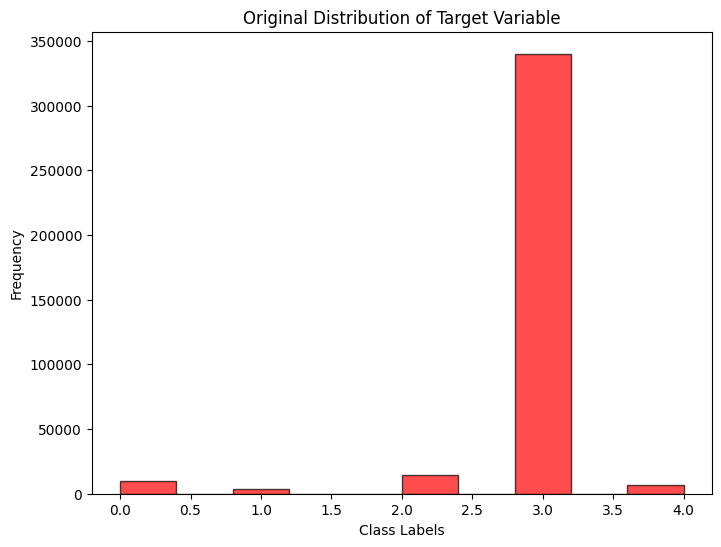

# ******************************************************************************************************************************************* 

# ***     Evaluate all balancing methods and architectures: 

# ******************************************************************************************************************************************* 



  0%|          | 0/2 [00:00<?, ?it/s]


 ******************************************************************************************************************************************* 


 ********************************************************** 

 *** 	 Evaluating method: ADASYN

 ********************************************************** 



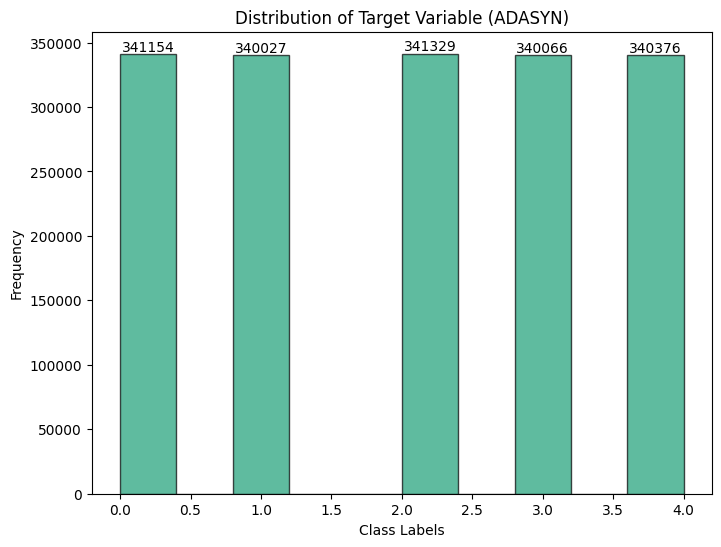


  0%|          | 0/1 [00:00<?, ?it/s]


********************************************************** 

*** 	 Evaluating architecture: SVM

********************************************************** 



In [ ]:
import os  # Ensure os is imported
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
import csv  # Import the csv module
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint


# Main execution block
if __name__ == "__main__":

    # Load and preprocess the dataset
    file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
    label_column = 'Attack type'  # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    #results_path= "/content/results_summary.csv"

    # Convert one-hot encoded labels to class indices
    y_classes = np.argmax(y, axis=1)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    # Use a single color instead of a palette
    plt.hist(y_classes, bins=10, alpha=0.7, color='red', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    print("# ******************************************************************************************************************************************* \n")
    print("# ***     Evaluate all balancing methods and architectures: \n")
    print("# ******************************************************************************************************************************************* \n")

    # Evaluate all balancing methods and architectures

    results = evaluate_balancing_methods(X, y) #, use_tpu=True)  # Use TPU

    pprint(results)



In [ ]:
from pprint import pprint

'''
results= {'SMOTE + ENN': { 'Random Forest': {'accuracy': 0.992734499205088,
                                             'auc': 0.999942323955265,
                                             'training_time': 6775.43287587166},
                              'XGBoost': {'accuracy': 0.9980833778320238,
                                          'auc': 0.999989129726275,
                                          'training_time': 6452.888343811035}},
            'ADASYN': {'Random Forest': {'accuracy': 0.9870137496293208,
                                         'auc': 0.9998352137323054,
                                         'training_time': 163.12124919891357},
                        'XGBoost': {'accuracy': 0.9964620321734867,
                                    'auc': 0.9999681377755765,
                                    'training_time': 172.568044424057}},
            'Random Oversampling': {'Random Forest': {'accuracy': 0.9884904694970976,
                                                      'auc': 0.9998976708763971,
                                                      'training_time': 24.421796560287476},
                                     'XGBoost': {'accuracy': 0.9974769603547546,
                                                 'auc': 0.9999809025758326,
                                                 'training_time': 33.17835879325867}},
             'Random Undersampling': {'Random Forest': {'accuracy': 0.972524154589372,
                                            'auc': 0.9979903550415345,
                                            'training_time': 36.80705451965332},
                                      'XGBoost': {'accuracy': 0.9764492753623188,
                                                  'auc': 0.9985102880727267,
                                                  'training_time': 38.27259945869446},
                                      'SVM': {'accuracy': 0.37318840579710144,
                                              'auc': 0.7020631619767961,
                                              'training_time': 11.985678911209106}},
             'SMOTE': {'Random Forest': {'accuracy': 0.9888727482312257,
                                         'auc': 0.9998580188702023,
                                         'training_time': 57.305946350097656},
                       'XGBoost': {'accuracy': 0.9968623737745026,
                                   'auc': 0.9999733134540654,
                                   'training_time': 66.82961750030518}},
             'Unbalanced': {'Random Forest': {'accuracy': 0.9956761373493654,
                                              'auc': 0.9980901438081059,
                                              'training_time': 5.582121133804321},
                            'XGBoost': {'accuracy': 0.9973709847463734,
                                        'auc': 0.9984653095369334,
                                        'training_time': 8.75592589378357},
                            'SVM': {'accuracy': 0.9076641800008007,
                                    'auc': 0.8814989156809073,
                                    'training_time': 226.82741236686707}

                                        }}

                                        '''

pprint(results)

{'ADASYN': {'Random Forest': {'accuracy': 0.9870137496293208,
                              'auc': 0.9998352137323054,
                              'training_time': 163.12124919891357},
            'XGBoost': {'accuracy': 0.9964620321734867,
                        'auc': 0.9999681377755765,
                        'training_time': 172.568044424057}},
 'Random Oversampling': {'Random Forest': {'accuracy': 0.9884904694970976,
                                           'auc': 0.9998976708763971,
                                           'training_time': 24.421796560287476},
                         'XGBoost': {'accuracy': 0.9974769603547546,
                                     'auc': 0.9999809025758326,
                                     'training_time': 33.17835879325867}},
 'Random Undersampling': {'Random Forest': {'accuracy': 0.972524154589372,
                                            'auc': 0.9979903550415345,
                                            'training_time': 36.8

In [ ]:
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
plot_results(results, model_names,balancing_methods, filename=' my_1plot.png')



In [ ]:
# Plot the results
model_names = list(architectures.keys())
balancing_methods = list(results.keys())
plot_results2(results, model_names,  filename='my_2plot.png')


### Final results in table

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

csv_file_path = "/content/model_results/results_summary.csv"

results_data = pd.read_csv(csv_file_path)
col_names= ['Model Name', 'Architecture', 'Test Accuracy', 'Test AUC',
       'Training Time', 'Classification Report']
results_data

,Model Name,Architecture,Test Accuracy,Test AUC,Training Time,Classification Report
0,Unbalanced_CNN + ResNet101,CNN + ResNet101,0.847224,0.959816,582.408604,precision recall f1-score ...
1,Random Oversampling_CNN + ResNet101,CNN + ResNet101,0.186173,0.565333,1303.712645,precision recall f1-score ...
2,Random Undersampling_CNN + ResNet101,CNN + ResNet101,0.324275,0.685830,522.213646,precision recall f1-score ...
3,SMOTE_CNN + ResNet101,CNN + ResNet101,0.512936,0.704381,1179.237570,precision recall f1-score ...
4,ADASYN_CNN + ResNet101,CNN + ResNet101,0.526899,0.829422,2459.371604,precision recall f1-score ...
5,SMOTE + ENN_CNN + ResNet101,CNN + ResNet101,0.672488,0.872896,1872.759967,precision recall f1-score ...


In [ ]:
features = ['Model Name', 'Architecture', 'Test Accuracy', 'Test AUC',
       'Training Time']

df_features = results_data[features]
df_features

,Model Name,Architecture,Test Accuracy,Test AUC,Training Time
0,Unbalanced_CNN + ResNet101,CNN + ResNet101,0.847224,0.959816,582.408604
1,Random Oversampling_CNN + ResNet101,CNN + ResNet101,0.186173,0.565333,1303.712645
2,Random Undersampling_CNN + ResNet101,CNN + ResNet101,0.324275,0.685830,522.213646
3,SMOTE_CNN + ResNet101,CNN + ResNet101,0.512936,0.704381,1179.237570
4,ADASYN_CNN + ResNet101,CNN + ResNet101,0.526899,0.829422,2459.371604
5,SMOTE + ENN_CNN + ResNet101,CNN + ResNet101,0.672488,0.872896,1872.759967


In [ ]:
df_features ['Test Accuracy']  = df_features ['Test Accuracy'] * 100
df_features ['Test AUC']  = df_features ['Test AUC'] * 100
#df_features ['Training Time']  = df_features ['Training Time'] / 60
# Rename columns
df_features.rename(columns={
    'Test Accuracy': 'Test Accuracy %',
    'Test AUC': 'Test AUC %',
    'Training Time': 'Training Time (Seconds)'
}, inplace=True)
# Step 3: Sort the DataFrame by 'Test AUC %' in descending order
df_features.sort_values(by='Test AUC %', ascending=False, inplace=True)


<ipython-input-55-ef439576c1a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features ['Test Accuracy']  = df_features ['Test Accuracy'] * 100
<ipython-input-55-ef439576c1a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features ['Test AUC']  = df_features ['Test AUC'] * 100
<ipython-input-55-ef439576c1a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
# Update the Model Name column to only keep the prefix before the underscore

df = df_features.copy()
df['Model Name'] = df['Model Name'].str.split('_').str[0]

df

,Model Name,Architecture,Test Accuracy %,Test AUC %,Training Time (Seconds)
0,Unbalanced,CNN + ResNet101,84.722352,95.981628,582.408604
5,SMOTE + ENN,CNN + ResNet101,67.248821,87.289554,1872.759967
4,ADASYN,CNN + ResNet101,52.689886,82.942230,2459.371604
3,SMOTE,CNN + ResNet101,51.293570,70.438141,1179.237570
2,Random Undersampling,CNN + ResNet101,32.427537,68.582958,522.213646
1,Random Oversampling,CNN + ResNet101,18.617268,56.533319,1303.712645


In [ ]:
# Save the DataFrame as a CSV file
df.to_csv('final_results_ml_models.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

# Get unique model names
unique_models = df['Model Name'].unique()

# Generate a color map for each unique model name
colors = plt.cm.get_cmap('Pastel1', len(unique_models))  # Use a colormap with enough distinct colors RdGy_r, Pastel2, Pastel1, Pastel1_r
color_mapping = {model: colors(i) for i, model in enumerate(unique_models)}
'''df_features ['Test Accuracy']  = df_features ['Test Accuracy'] * 100
df_features ['Test AUC']  = df_features ['Test AUC'] * 100
#df_features ['Training Time']  = df_features ['Training Time'] / 60
# Rename columns
df_features.rename(columns={
    'Test Accuracy': 'Test Accuracy %',
    'Test AUC': 'Test AUC %',
    'Training Time': 'Training Time (Seconds)'
}, inplace=True)'''
# Step 3: Sort the DataFrame by 'Test AUC %' in descending order
df.sort_values(by='Test AUC %', ascending=False, inplace=True)


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))  # Set the size of the figure

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

# Style the table
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d9d9d9')  # Light gray background for header
    else:
        model_name = df['Model Name'][i-1]
        cell.set_facecolor(color_mapping[model_name])  # Assign color based on model name
        cell.set_fontsize(12)  # Set font size for data cells
# Step 3: Sort the DataFrame by 'Test AUC %' in descending order
#df_features.sort_values(by='Test AUC %', ascending=False, inplace=True)
# Save the figure as an image
plt.savefig('styled_results_table.png', bbox_inches='tight', dpi=300)
plt.close()
print('Successfully saved the styled table as styled_results_table.png')

'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r',
'''

<ipython-input-76-c58069f095da>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Pastel1', len(unique_models))  # Use a colormap with enough distinct colors RdGy_r, Pastel2, Pastel1, Pastel1_r


Successfully saved the styled table as styled_results_table.png


"\n'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag'